In [47]:
import numpy as np
from activation import Sigmoid, RELU
from propagation import forward,  backward
from cost_function import Logistic_loss
from optimizer import GD
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [63]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(9) #used so that we get the same random values generated everytime

In [49]:
X, Y = load_planar_dataset()

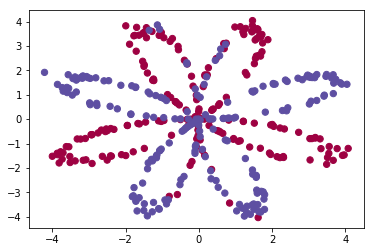

In [50]:
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

```
Layer dimension is an array with values specifying number of nodes in each layer
eg:- [3,4,2]
here,
    layer1 has 3 nodes
                        #weights1 with shape(4,3) and #bias1 with shape(4,1)
    layer2 has 4 nodes 
                        #weights2 with shape(2,4) and #bias2 with shape(2,1) 
    layer3 has 2 nodes
```


**Functions used:-**

**np.zeroes(){visit}:- https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html**

**np.random.randn(){visit}:- https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html**

**np.random.seed(){visit}:- https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do**

```
def zero_init(layer_dims):
    parameters = {} #Data dictionary to store the 'key' as weight and bias 
    #and 'value' as array of values defined below 
    L = len(layer_dims)
    for i in range(1,L):
        parameters['W' + str(i)] = np.zeroes((layer_dims[l], layer_dims[l-1]))
        parameters['B' + str(i)] = np.zeroes((layer_dims[l],1))
        
    return parameters

def random_init(layer_dims):
    parameters = {}
    L = len(layer_dims)
    for i in range(1,L):
        parameters['W' + str(i)] = np.random.randn((layer_dims[l], layer_dims[l-1]))
        parameters['B' + str(i)] = np.zeroes((layer_dims[l],1))
        
    return parameters

def he_init(layer_dims):
    parameters = {}
    L = len(layer_dims)
    for i in range(1,L):
        parameters['W' + str(i)] = np.random.randn((layer_dims[l], layer_dims[l-1])) * (np.sqrt(2/layer_dims(l-1)))
        parameters['B' + str(i)] = np.zeroes((layer_dims[l],1))
        
    return parameters

def xavier_init(layer_dims):
    parameters = {}
    L = len(layer_dims)
    for i in range(1,L):
        parameters['W' + str(i)] = np.random.randn((layer_dims[l], layer_dims[l-1])) * (np.sqrt(1/layer_dims(l-1)))
        parameters['B' + str(i)] = np.zeroes((layer_dims[l],1))
        
    return parameters
```

In [60]:
def he_init(layer_dims):
    parameters = {}
    L = len(layer_dims) -1
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*(np.sqrt(2/layer_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###
        
    return parameters

In [61]:
def nn_model(X, Y, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    x = X.shape[0]
    y = Y.shape[0]
    parameters = he_init([x,4,y])
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        AL, cache = forward(X, parameters, activation = 'relu')
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = logistic_loss(AL, Y)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward(AL, Y, cache)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = GD(parameters, grads, learning_rate = 0.01)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [62]:
parameters = nn_model(X, Y, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()